## INTRODUCTION

Exploring the Nigerian house dataset, in this notebook we will be exploring the dataset, cleaning it and finally building a model to predict the price of a house based on the features in the dataset.

This datasets contains Houses listings in Nigeria and their prices based on Location and other parameters.

Datashape (24326, 8)

Parameters:

- bedrooms -> number of bedrooms in the houses
- bathrooms -> number of bathrooms in the houses
- toilets -> number of toilets 
- parking_space
- title -> house type
- town -> town in which the house is located
- state -> state within Nigeria in which the house is located and finally
- price -> the target column.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider


In [3]:
data  =  pd.read_csv('archive/nigeria_houses_data.csv')

In [4]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


## Exlporatory Data Analysis

In [6]:
data['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [7]:
data['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

<AxesSubplot:xlabel='state'>

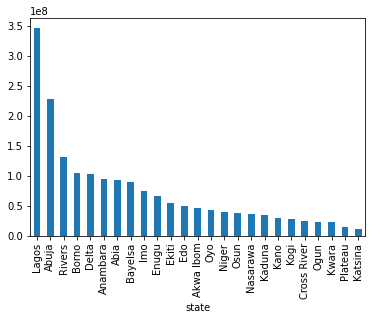

In [8]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

Lagos seems to be off the league of other states and this information may possibily because of outliers

<AxesSubplot:xlabel='town'>

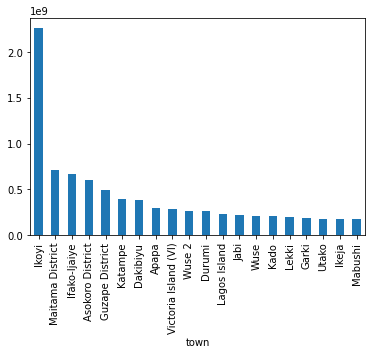

In [9]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

just a confirmation of the previous, Ikoyi is probably the most expensive area in Lagos and that is what is causing the outliers, lets further confirm this

In [10]:
# Detecting suspected outlier
print(data[data["town"]=="Ikoyi"].max())
print(data[data["town"]=="Ifako-Ijaiye"].max())
print(data[data["town"]=="Ikeja"].max())

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [11]:
trimmed_data = q1, q9 = data["price"].quantile([0.15,0.85])
mask_data = data["price"].between(q1,q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [12]:
trimmed_data['town'].unique()

array(['Lekki', 'Ajah', 'Oredo', 'Lokogoma District',
       'Victoria Island (VI)', 'Katampe', 'Magodo', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Yaba', 'Agege', 'Jahi', 'Orozo', 'Owerri North',
       'Ikeja', 'Idu Industrial', 'Owerri Municipal', 'Isheri North',
       'Utako', 'Guzape District', 'Port Harcourt', 'Isheri', 'Ibadan',
       'Ikoyi', 'Life Camp', 'Dape', 'Ejigbo', 'Isolo', 'Gaduwa', 'Dakwo',
       'Asokoro District', 'Chikun', 'Ojodu', 'Lugbe District', 'Wuye',
       'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Sango Ota',
       'Surulere', 'Obio-Akpor', 'Enugu', 'Apo', 'Ibeju Lekki', 'Wuse 2',
       'Mowe Town', 'Durumi', 'Simawa', 'Arepo', 'Mabushi', 'Alimosho',
       'Maryland', 'Karsana', 'Wuse', 'Karmo', 'Ifo', 'Gbagada', 'Idimu',
       'Maitama District', 'Gudu', 'Ikotun', 'Kukwaba', 'Mbora (Nbora)',
       'Jabi', 'Ikorodu', 'Kaduna South', 'Asaba', 'Uyo', 'Kosofe',
       'Ibafo', 'Ilupeju', 'Afijio', 'Ifako-Ijaiye', 'Ado-Ekiti', 'Ipaja',
       'Oluyo

In [13]:
records = trimmed_data['state'].value_counts()
records

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

In [14]:
# remove the states with few entries
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]


In [15]:
trimmed_data['state'].value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

SO, we ended up reducing the entries of the dataset 

<AxesSubplot:title={'center':'Most Expensive towns in nigeria'}, xlabel='town'>

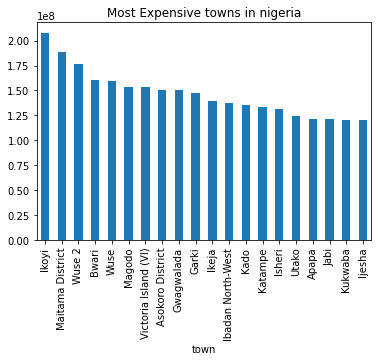

In [16]:
# checking the chart again
trimmed_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

As you can see, the average looks more stabilized 

In [17]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [18]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']

C:\Users\NDUKWE\AppData\Local\Temp\ipykernel_13536\1034165030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']


In [19]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


<AxesSubplot:>

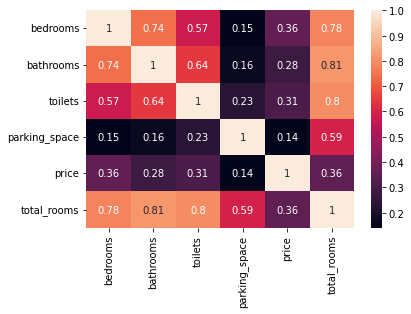

In [20]:
corr = trimmed_data.corr()
sns.heatmap(corr, annot=True)

In [21]:
print(corr)

               bedrooms  bathrooms   toilets  parking_space     price  \
bedrooms       1.000000   0.739923  0.571015       0.145919  0.356347   
bathrooms      0.739923   1.000000  0.642284       0.161377  0.276956   
toilets        0.571015   0.642284  1.000000       0.234386  0.313762   
parking_space  0.145919   0.161377  0.234386       1.000000  0.140579   
price          0.356347   0.276956  0.313762       0.140579  1.000000   
total_rooms    0.779405   0.813967  0.797351       0.593667  0.355218   

               total_rooms  
bedrooms          0.779405  
bathrooms         0.813967  
toilets           0.797351  
parking_space     0.593667  
price             0.355218  
total_rooms       1.000000  


In [22]:
trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)

C:\Users\NDUKWE\AppData\Local\Temp\ipykernel_13536\3431237452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)


In [23]:
# removing outliers
trim = q1, q9 = trimmed_data["price"].quantile([0.1, 0.9])
mask = trimmed_data["price"].between(q1,q9)
trimmed_data = trimmed_data[mask]

In [24]:
trimmed_data

,bedrooms,bathrooms,toilets,price,total_rooms
2,4.0,5.0,5.0,120000000.0,18.0
4,4.0,4.0,5.0,75000000.0,15.0
6,4.0,5.0,5.0,65000000.0,18.0
9,4.0,4.0,5.0,60000000.0,18.0
12,4.0,5.0,6.0,65000000.0,18.0
...,...,...,...,...,...
24318,4.0,5.0,5.0,110000000.0,18.0
24320,3.0,4.0,4.0,80000000.0,16.0
24323,4.0,5.0,5.0,68000000.0,18.0
24324,3.0,4.0,4.0,78000000.0,14.0


In [25]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14178 entries, 2 to 24325
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14178 non-null  float64
 1   bathrooms    14178 non-null  float64
 2   toilets      14178 non-null  float64
 3   price        14178 non-null  float64
 4   total_rooms  14178 non-null  float64
dtypes: float64(5)
memory usage: 664.6 KB


## Model Building and Selection

In [27]:
X = trimmed_data.drop('price', axis = 1)
y = trimmed_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")


Linear Regression: 
  Mean Squared Error: 1174364955823664.7500
  R2 Score: 0.1415
Ridge Regression: 
  Mean Squared Error: 1174371154239986.0000
  R2 Score: 0.1415
Lasso Regression: 
  Mean Squared Error: 1174364965678561.7500
  R2 Score: 0.1415
Elastic Net Regression: 
  Mean Squared Error: 1196502860888261.7500
  R2 Score: 0.1253
Decision Tree Regression: 
  Mean Squared Error: 1128135507712871.0000
  R2 Score: 0.1753
Random Forest Regression: 
  Mean Squared Error: 1102022410724192.2500
  R2 Score: 0.1944
Gradient Boosting Regression: 
  Mean Squared Error: 1069343254061334.3750
  R2 Score: 0.2183
SVR: 
  Mean Squared Error: 1479372524500508.5000
  R2 Score: -0.0814
KNN Regression: 
  Mean Squared Error: 1224806535652709.0000
  R2 Score: 0.1046


In [28]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MSE:", mean_squared_error(y_train, y_pred_baseline))

Mean price: 94950130.76697232
Baseline MSE: 1342225635426989.5


The best model here is Gradient Boosting Regressor which has the lowest MSE, this means that it is making predictions that are closer to the actual values on average compared to other models, and it has the highest R2 score which means that it is explaining the variance in the data better than other models 

### Hyperparameter Tuning

GridSearchCV

In [29]:

gbr = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [150, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 100, 200]},
             verbose=2)

In [30]:
best_params = grid_search.best_params_
print("Best Hyperparameter: ", best_params)

Best Hyperparameter:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [31]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3)

Testing the best model on the dataset

In [32]:
y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 1075107514606726.8750
  R2 Score: 0.2141


RandomSearchCV

In [33]:

param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
    # Add other hyperparameters to explore
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1, verbose = 2)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=2)

In [34]:
best_params_randCV = random_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.01}


In [35]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=10,
                          n_estimators=300, subsample=0.8)

In [36]:
y_pred = best_grid_randCV.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 1070913610222027.6250
  R2 Score: 0.2171


We will be going with the RandomSearch Parameters, its kind of tricky the BaseLine model sets the standard and all the models did well, but GradientBoostRegressor was the best and then tuning the hyperparameters a little bit

It seems as thought the hyperparameters gave us a little higher MSE and a little lower r2score, just to avoid overfitting it would be accepted  

In [37]:
# testing the model

def make_prediction(bedrooms, bathrooms, toilets, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "total_rooms":total_rooms
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction}"

In [38]:
# testing 
make_prediction(bedrooms = 3, bathrooms = 4,toilets = 6, total_rooms = 16)

'Predicted apartment price: ₦[75376029.47089544]'

Yeah, the model is working

Making an interactive layout

In [43]:

custom_font_style = {
    'font-family': 'Arial',   
    'font-size': '20px'      
}

interact(
    make_prediction,    
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
        style=custom_font_style
    ),
    bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        step=1,
        value=X_train["bathrooms"].mean(),
        style=custom_font_style
    ),
    toilets=IntSlider(
        min=X_train["toilets"].min(),
        max=X_train["toilets"].max(),
        step=1,
        value=X_train["toilets"].mean(),
        style=custom_font_style
    ),
    total_rooms=IntSlider(
        min=X_train["total_rooms"].min(),
        max=X_train["total_rooms"].max(),
        step=1,
        value=X_train["total_rooms"].mean(),
        style=custom_font_style
    )
    
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=9, min=1), IntSlider(value=4, description…

NICE !!!